### Load libraries

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb
import wandb.sdk

In [2]:
sys.path.append("../..")
from src.utils import runs_to_df

### Load data

In [3]:
api = wandb.Api()
runs: list[wandb.sdk.wandb_run.Run] = api.runs(
    f"data-frugal-learning/student-teacher-v2",
    filters={"tags": {"$in": ["overparam-scaling-4-2-1"]}},
)

df_all = runs_to_df(runs)
df = df_all[
    (df_all.state == "finished")
]
len(df)

73

### Plots

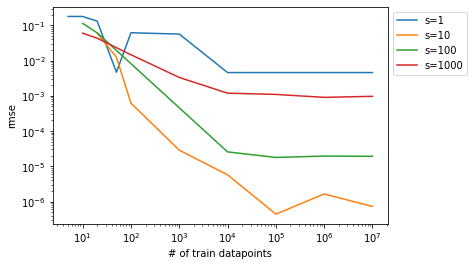

In [4]:
for s in sorted(df.student_width_scale_factor.unique()):
    cdf = df[df.student_width_scale_factor == s].sort_values("n_train").groupby("n_train", as_index=False).median()
    
    plt.plot(cdf.n_train, cdf.test_rmse, label=f"{s=}")

plt.ylabel("rmse")
plt.xlabel("# of train datapoints")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

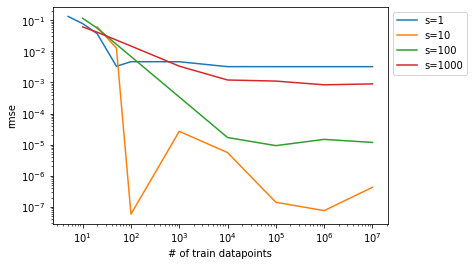

In [5]:
for s in sorted(df.student_width_scale_factor.unique()):
    cdf = df[df.student_width_scale_factor == s].sort_values("n_train").groupby("n_train", as_index=False).min()
    
    plt.plot(cdf.n_train, cdf.test_rmse, label=f"{s=}")

plt.ylabel("rmse")
plt.xlabel("# of train datapoints")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));